<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/p3_adaboost_all_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import graphviz 
from sklearn import model_selection
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
path = '/gdrive/My Drive/'

In [4]:
dataset = pd.read_csv(path +'Copy of train.psv', sep='|')

In [5]:
dataset.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE( random_state= 0 )

In [7]:


categorical = dataset.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True
dataset = dataset.astype({"Unit1":'category', "Unit2":'category', "Gender":'category', "SepsisLabel":'category'})

#X_train3 = pd.DataFrame(X_train2)
#plotHistogram(X_train,None,4,'HR vs Diagnosis (Blue = Non-Sepsis; Orange = Sepsis)')
#plotHistogram(X_train,None,3,'O2Sat vs Diagnosis (Blue = Non-Sepsis; Orange = Sepsis)')

In [8]:
labels = {0:'HR', 1:'O2Sat', 2:'Temp', 3:'SBP', 4:'MAP', 5:'DBP', 6:'Resp', 7:'EtCO2',
       8:'BaseExcess', 9:'HCO3', 10:'FiO2', 11:'pH', 12:'PaCO2', 13:'SaO2', 14:'AST', 15:'BUN',
       16:'Alkalinephos', 17:'Calcium', 18:'Chloride', 19:'Creatinine', 20:'Bilirubin_direct',
       21:'Glucose', 22:'Lactate', 23:'Magnesium', 24:'Phosphate', 25:'Potassium',
       26:'Bilirubin_total', 27:'TroponinI', 28:'Hct', 29:'Hgb', 30:'PTT', 31:'WBC',
       32:'Fibrinogen', 33:'Platelets', 34:'Age', 35:'Gender', 36:'Unit1', 37:'Unit2',
       38:'HospAdmTime', 39:'ICULOS'}
print(labels)
print("\nColumn #, # of Zero Values\n")
#print((X_train3[:] == np.nan).sum())
# data[:] = data[:].replace(0, np.NaN)
# print("\nColumn #, # of Null Values\n")
# print(np.isnan(X_train3).sum())

{0: 'HR', 1: 'O2Sat', 2: 'Temp', 3: 'SBP', 4: 'MAP', 5: 'DBP', 6: 'Resp', 7: 'EtCO2', 8: 'BaseExcess', 9: 'HCO3', 10: 'FiO2', 11: 'pH', 12: 'PaCO2', 13: 'SaO2', 14: 'AST', 15: 'BUN', 16: 'Alkalinephos', 17: 'Calcium', 18: 'Chloride', 19: 'Creatinine', 20: 'Bilirubin_direct', 21: 'Glucose', 22: 'Lactate', 23: 'Magnesium', 24: 'Phosphate', 25: 'Potassium', 26: 'Bilirubin_total', 27: 'TroponinI', 28: 'Hct', 29: 'Hgb', 30: 'PTT', 31: 'WBC', 32: 'Fibrinogen', 33: 'Platelets', 34: 'Age', 35: 'Gender', 36: 'Unit1', 37: 'Unit2', 38: 'HospAdmTime', 39: 'ICULOS'}

Column #, # of Zero Values



In [9]:
dataset = dataset.astype({"Unit1":'category', "Unit2":'category', "Gender":'category', "SepsisLabel":'category'})

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167202 entries, 0 to 1167201
Data columns (total 41 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   HR                1059467 non-null  float64 
 1   O2Sat             1017873 non-null  float64 
 2   Temp              394625 non-null   float64 
 3   SBP               993285 non-null   float64 
 4   MAP               1029532 non-null  float64 
 5   DBP               733099 non-null   float64 
 6   Resp              1010036 non-null  float64 
 7   EtCO2             27401 non-null    float64 
 8   BaseExcess        83331 non-null    float64 
 9   HCO3              64410 non-null    float64 
 10  FiO2              120467 non-null   float64 
 11  pH                98926 non-null    float64 
 12  PaCO2             77635 non-null    float64 
 13  SaO2              46267 non-null    float64 
 14  AST               18512 non-null    float64 
 15  BUN               85097 non-null

In [11]:
dataset=dataset.sample(n=100000, random_state=42, replace=True)

In [12]:
dataset.SepsisLabel.value_counts()

0    98038
1     1962
Name: SepsisLabel, dtype: int64

In [13]:
Xcol = dataset.drop(columns = ["SepsisLabel"])
ycol = dataset["SepsisLabel"]
X=np.array(Xcol)
y=np.array(ycol)
X.shape,y.shape


((100000, 40), (100000,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75000, 40), (25000, 40), (75000,), (25000,))

In [15]:
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [16]:
X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)

In [17]:
X_train_rs.shape, y_train_rs.shape

((147014, 40), (147014,))

In [18]:
X_test_rs, y_test_rs = smote.fit_resample(X_test, y_test)

In [19]:
X_test_rs.shape, y_test_rs.shape

((49062, 40), (49062,))

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
logref_clf=LogisticRegression()

In [22]:
ada_clf=AdaBoostClassifier(logref_clf, n_estimators=50)
ada_clf.fit(X_train_rs,y_train_rs)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [23]:
ada_clf_pred=ada_clf.predict(X_test_rs)

In [24]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test_rs, ada_clf_pred ))

ac= accuracy_score(y_test_rs, ada_clf_pred)
print('test_accuracy = {} % '.format(ac * 100))

              precision    recall  f1-score   support

           0       0.66      0.74      0.69     24531
           1       0.70      0.62      0.66     24531

    accuracy                           0.68     49062
   macro avg       0.68      0.68      0.68     49062
weighted avg       0.68      0.68      0.68     49062

test_accuracy = 67.62056173820879 % 


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train_rs, y_train_rs)

y_pred = rf.predict(X_test_rs)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_rs, y_pred))

0.8669642493171905


Feature ranking:
1 ICULOS 0.141743453284083
2 Gender 0.13656985699882546
3 Unit2 0.07989541158754049
4 Unit1 0.07538938843771444
5 O2Sat 0.0696259578204618
6 Resp 0.06500489885752836
7 HospAdmTime 0.057364035706925165
8 HR 0.048815009130512454
9 DBP 0.04574988744537757
10 Age 0.04048819560083888
11 SBP 0.03717774493175368
12 Temp 0.03652940565676784
13 MAP 0.03571695491419257
14 FiO2 0.031092750141597902
15 EtCO2 0.020144783995631018
16 pH 0.011107110313692959
17 BaseExcess 0.008945179503341727
18 Glucose 0.007330369758288428
19 PaCO2 0.0067238040001317825
20 Lactate 0.004772121420537228
21 Hct 0.004467884386739534
22 Potassium 0.0043654809309951964
23 Magnesium 0.0031672681073126262
24 SaO2 0.003023787363166943
25 Hgb 0.0028304737165240146
26 BUN 0.0026600585301052187
27 HCO3 0.0026463857074051182
28 Calcium 0.0022962266904000437
29 Chloride 0.0022626344024123395
30 Platelets 0.0020863969483749306
31 PTT 0.0020638709911555203
32 WBC 0.0019023235253015022
33 Creatinine 0.00162433682925

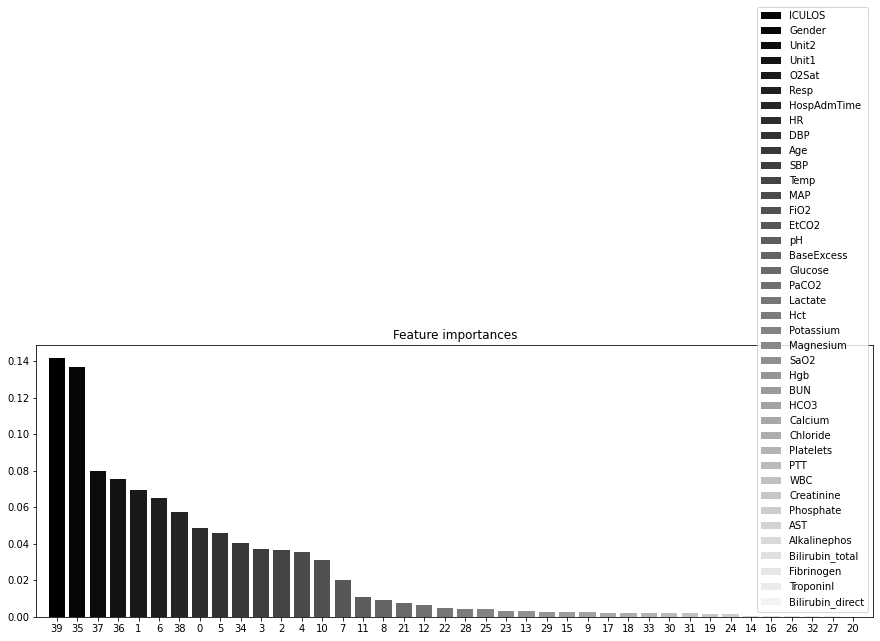

In [26]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

features = dict(zip(range(len(dataset.columns)-1), dataset.columns[:-1]))

# feature importance scores
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = max(39, len(dataset.columns[:-1]))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices]);

In [27]:
dataset.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [28]:
cols=['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'BUN',
        'Calcium', 'Chloride',
       'Glucose', 'Lactate', 'Magnesium', 'Potassium',
        'Hct', 'Hgb', 'PTT', 'WBC',
        'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel']

In [29]:
dataset=dataset[cols]

In [30]:
Xcol_fi = dataset.drop(columns = ["SepsisLabel"])
ycol_fi = dataset["SepsisLabel"]
X_fi=np.array(Xcol_fi)
y_fi=np.array(ycol_fi)
X_fi.shape,y_fi.shape


((100000, 32), (100000,))

In [31]:
X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(X_fi, y_fi, test_size=0.25, random_state = 1)
X_train_fi.shape, X_test_fi.shape, y_train_fi.shape, y_test_fi.shape

((75000, 32), (25000, 32), (75000,), (25000,))

In [32]:
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
X_train_fi = imputer.fit_transform(X_train_fi)
X_test_fi = imputer.transform(X_test_fi)

In [33]:
X_train_fi_rs, y_train_fi_rs = smote.fit_resample(X_train_fi, y_train_fi)

In [34]:
X_test_fi_rs, y_test_fi_rs = smote.fit_resample(X_test_fi, y_test_fi)

In [35]:
ada_clf.fit(X_train_fi_rs,y_train_fi_rs)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [36]:
ada_clf_pred=ada_clf.predict(X_test_fi_rs)

In [37]:
print(classification_report(y_test_fi_rs, ada_clf_pred ))

ac= accuracy_score(y_test_fi_rs, ada_clf_pred)
print('test_accuracy = {} % '.format(ac * 100))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69     24531
           1       0.70      0.62      0.65     24531

    accuracy                           0.67     49062
   macro avg       0.68      0.67      0.67     49062
weighted avg       0.68      0.67      0.67     49062

test_accuracy = 67.49622926093515 % 


In [38]:
cols2=['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
         'FiO2',  'Chloride', 'PTT', 'WBC',
        'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel']

In [39]:
dataset=dataset[cols2]

In [40]:
Xcol2_fi2 = dataset.drop(columns = ["SepsisLabel"])
ycol2_fi2 = dataset["SepsisLabel"]
X_fi2=np.array(Xcol2_fi2)
y_fi2=np.array(ycol2_fi2)
X_fi2.shape,y_fi2.shape

((100000, 19), (100000,))

In [41]:
X_train_fi2, X_test_fi2, y_train_fi2, y_test_fi2 = train_test_split(X_fi2, y_fi2, test_size=0.25, random_state = 1)
X_train_fi2.shape, X_test_fi2.shape, y_train_fi2.shape, y_test_fi2.shape

((75000, 19), (25000, 19), (75000,), (25000,))

In [42]:
X_train_fi2 = imputer.fit_transform(X_train_fi2)
X_test_fi2 = imputer.transform(X_test_fi2)

In [43]:
X_train_fi2_rs, y_train_fi2_rs = smote.fit_resample(X_train_fi2, y_train_fi2)

In [44]:
X_test_fi2_rs, y_test_fi2_rs = smote.fit_resample(X_test_fi2, y_test_fi2)

In [45]:
ada_clf.fit(X_train_fi2_rs,y_train_fi2_rs)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [46]:
ada_clf_pred=ada_clf.predict(X_test_fi2_rs)

In [47]:
print(classification_report(y_test_fi2_rs, ada_clf_pred ))

ac= accuracy_score(y_test_fi2_rs, ada_clf_pred)
print('test_accuracy = {} % '.format(ac * 100))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69     24531
           1       0.70      0.61      0.65     24531

    accuracy                           0.67     49062
   macro avg       0.68      0.67      0.67     49062
weighted avg       0.68      0.67      0.67     49062

test_accuracy = 67.26183196771433 % 


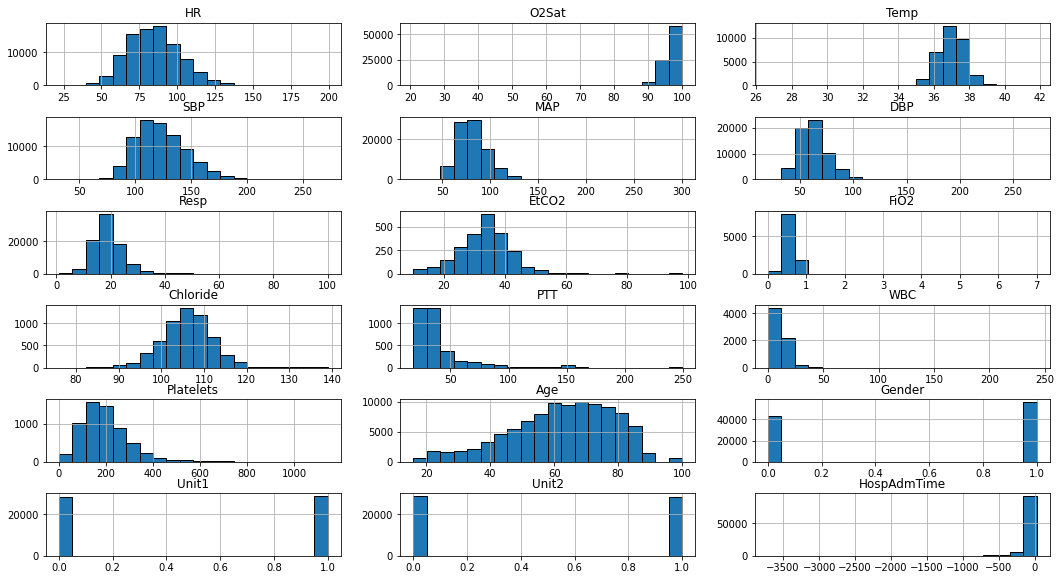

In [48]:
columns=dataset.columns[:18]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dataset[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [49]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HR,91015.0,84.672411,17.212378,22.00,72.00,83.50,96.00,199.00
O2Sat,87450.0,97.212436,2.855060,21.00,96.00,98.00,99.50,100.00
Temp,33552.0,36.997458,0.770979,26.67,36.50,37.00,37.50,41.80
SBP,85311.0,122.780957,22.707056,32.00,106.00,120.00,137.00,272.00
MAP,88445.0,81.087112,16.027749,20.00,70.00,79.00,90.00,300.00
DBP,62802.0,62.680821,13.673946,20.00,53.00,61.00,70.00,272.00
Resp,86775.0,18.727733,5.217491,1.00,15.00,18.00,22.00,100.00
EtCO2,2406.0,33.123026,8.238924,10.00,28.00,33.50,38.00,98.00
FiO2,10165.0,0.526447,0.208428,0.00,0.40,0.50,0.50,7.00
Chloride,5854.0,106.023830,5.876272,76.00,103.00,106.00,110.00,139.00


In [50]:
dataset.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
HR,0.421023,0.335243
O2Sat,-3.428329,42.203636
Temp,-0.364221,3.015331
SBP,0.579053,0.455117
MAP,1.154209,6.502418
DBP,1.117152,6.016469
Resp,1.025374,5.187036
EtCO2,0.319490,3.337348
FiO2,6.921490,183.087758
Chloride,-0.015604,1.881875


In [51]:
# Python log transform
dataset.insert(len(dataset.columns), 'HR_log',
         np.log(dataset['HR']))

In [52]:
dataset.agg(['skew']).transpose()

,skew
HR,0.421023
O2Sat,-3.428329
Temp,-0.364221
SBP,0.579053
MAP,1.154209
DBP,1.117152
Resp,1.025374
EtCO2,0.319490
FiO2,6.921490
Chloride,-0.015604


In [53]:
# Python Square root transformation
dataset.insert(len(dataset.columns), 'HR_Sqrt',
         np.sqrt(dataset['HR']))

In [54]:
dataset.agg(['skew']).transpose()

,skew
HR,0.421023
O2Sat,-3.428329
Temp,-0.364221
SBP,0.579053
MAP,1.154209
DBP,1.117152
Resp,1.025374
EtCO2,0.319490
FiO2,6.921490
Chloride,-0.015604


In [55]:
dataset.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'FiO2',
       'Chloride', 'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'HR_log', 'HR_Sqrt'],
      dtype='object')

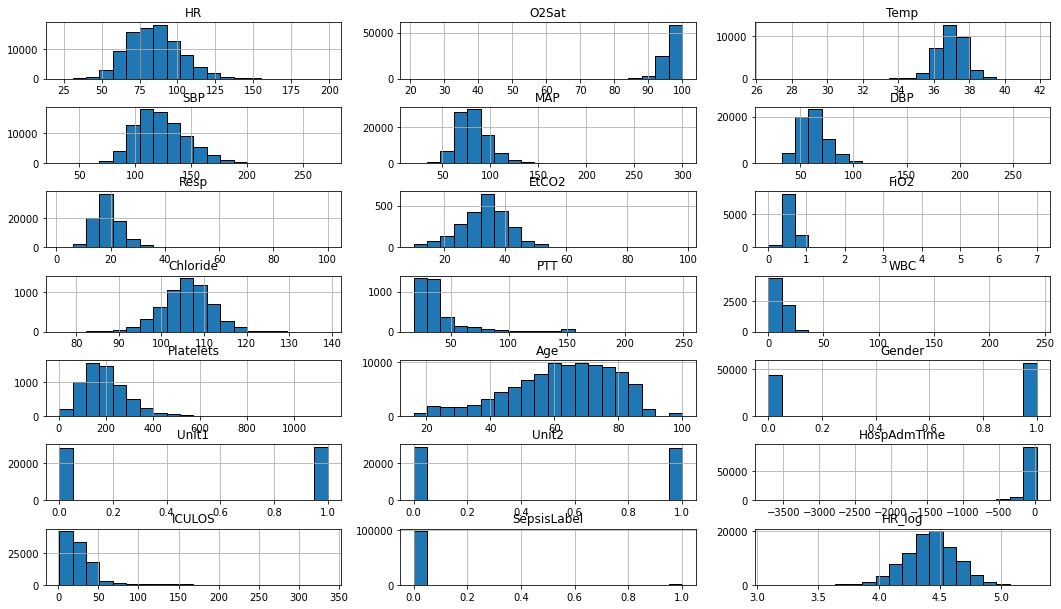

In [56]:
columns=dataset.columns[:21]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dataset[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [57]:
from scipy import stats

In [58]:

dataset1=dataset.drop(columns=['Gender','Unit1','Unit2','SepsisLabel', 'HospAdmTime'])

In [59]:
dataset1 = imputer.fit_transform(dataset1)

In [60]:
dataset1.dtype

dtype('float64')

In [61]:
import math

In [62]:
dataset1=np.array(dataset1)

In [63]:
dataset1.dtype

dtype('float64')

In [64]:
dataset1 = dataset1.astype(int)

In [65]:
shapiro_test = stats.shapiro(dataset1)

In [66]:
shapiro_test

(0.8890882134437561, 0.0)

In [67]:
k2, p = stats.normaltest(dataset1)

In [68]:
alpha = 0.05

In [69]:
dataset2=dataset

In [70]:
dataset2.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,FiO2,Chloride,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,HR_log,HR_Sqrt
121958,80.0,100.0,NaN,81.0,52.33,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,60.78,0,1.0,0.0,-0.02,27,0,4.382027,8.944272
671155,99.0,98.0,37.89,107.0,72.00,NaN,27.0,NaN,NaN,108.0,NaN,NaN,NaN,48.32,0,1.0,0.0,-0.02,36,0,4.595120,9.949874
131932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.33,0,0.0,1.0,-1.37,1,0,NaN,NaN
259178,96.0,100.0,37.72,149.0,70.00,52.0,20.0,NaN,0.35,NaN,NaN,NaN,NaN,84.40,1,0.0,1.0,-95.19,43,1,4.564348,9.797959
110268,55.0,97.0,NaN,148.0,72.00,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,71.89,1,NaN,NaN,-118.62,29,0,4.007333,7.416198


In [71]:
dataset2.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'FiO2',
       'Chloride', 'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'HR_log', 'HR_Sqrt'],
      dtype='object')

In [72]:
cols=['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'FiO2',
       'Chloride', 'PTT', 'WBC', 'Platelets', 'Age',
        'HospAdmTime', 'ICULOS']

In [73]:
dataset2=dataset2[cols]

In [74]:
dataset2.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,FiO2,Chloride,PTT,WBC,Platelets,Age,HospAdmTime,ICULOS
121958,80.0,100.0,NaN,81.0,52.33,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,60.78,-0.02,27
671155,99.0,98.0,37.89,107.0,72.00,NaN,27.0,NaN,NaN,108.0,NaN,NaN,NaN,48.32,-0.02,36
131932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.33,-1.37,1
259178,96.0,100.0,37.72,149.0,70.00,52.0,20.0,NaN,0.35,NaN,NaN,NaN,NaN,84.40,-95.19,43
110268,55.0,97.0,NaN,148.0,72.00,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,71.89,-118.62,29


In [75]:
dataset2 = imputer.fit_transform(dataset2)

In [76]:
dataset2= pd.DataFrame(dataset2, columns=cols)

In [77]:
dataset2.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,FiO2,Chloride,PTT,WBC,Platelets,Age,HospAdmTime,ICULOS
0,80.0,100.0,37.00,81.0,52.33,61.0,11.0,33.5,0.50,106.0,32.3,10.4,182.0,60.78,-0.02,27.0
1,99.0,98.0,37.89,107.0,72.00,61.0,27.0,33.5,0.50,108.0,32.3,10.4,182.0,48.32,-0.02,36.0
2,83.5,98.0,37.00,120.0,79.00,61.0,18.0,33.5,0.50,106.0,32.3,10.4,182.0,80.33,-1.37,1.0
3,96.0,100.0,37.72,149.0,70.00,52.0,20.0,33.5,0.35,106.0,32.3,10.4,182.0,84.40,-95.19,43.0
4,55.0,97.0,37.00,148.0,72.00,61.0,17.0,33.5,0.50,106.0,32.3,10.4,182.0,71.89,-118.62,29.0


QQ plot of: HR


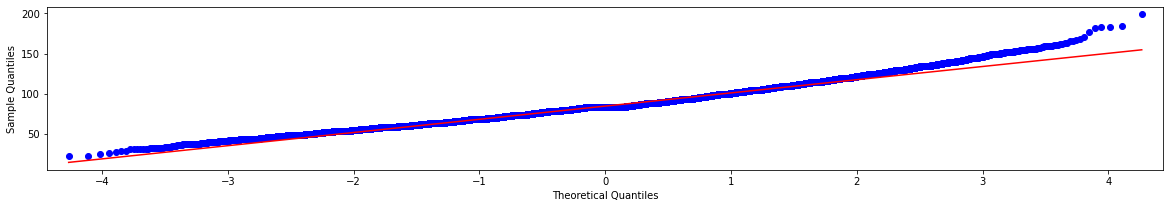

QQ plot of: O2Sat


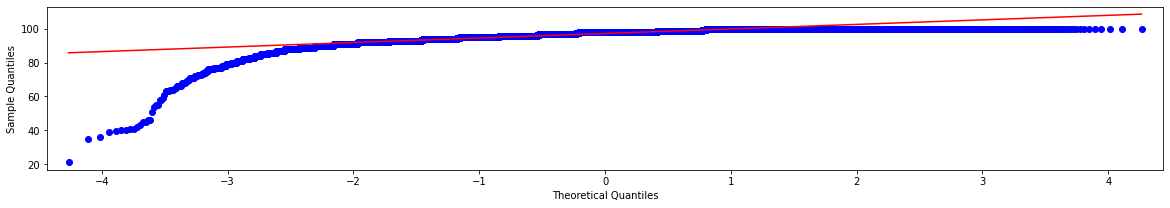

QQ plot of: Temp


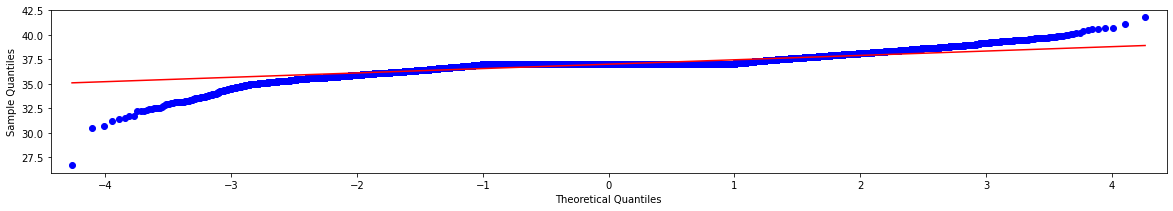

QQ plot of: SBP


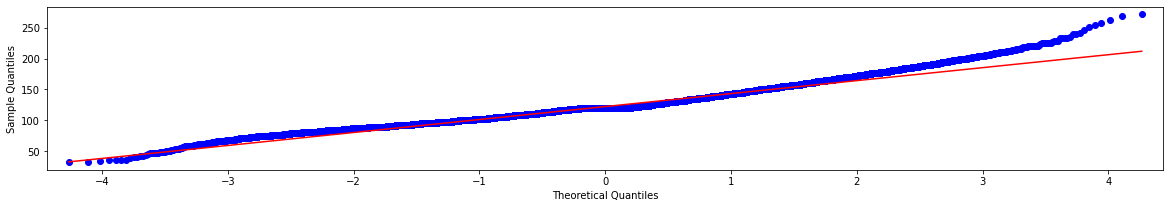

QQ plot of: MAP


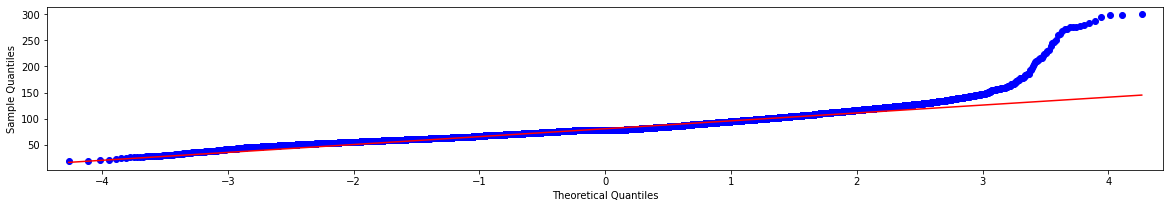

QQ plot of: DBP


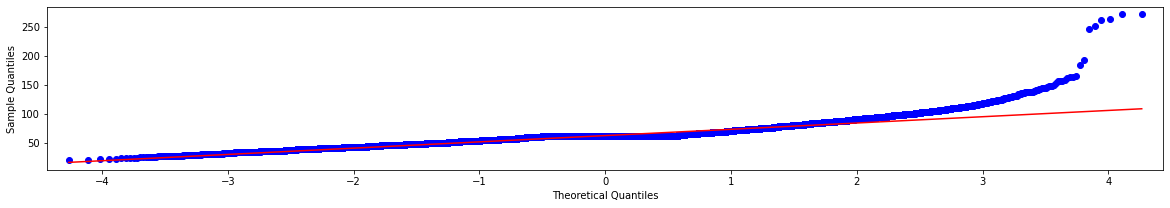

QQ plot of: Resp


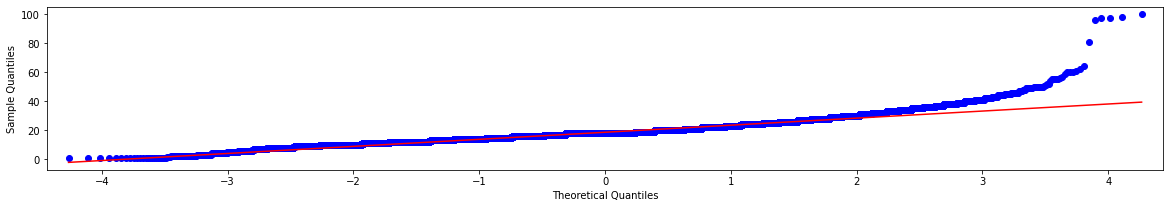

QQ plot of: EtCO2


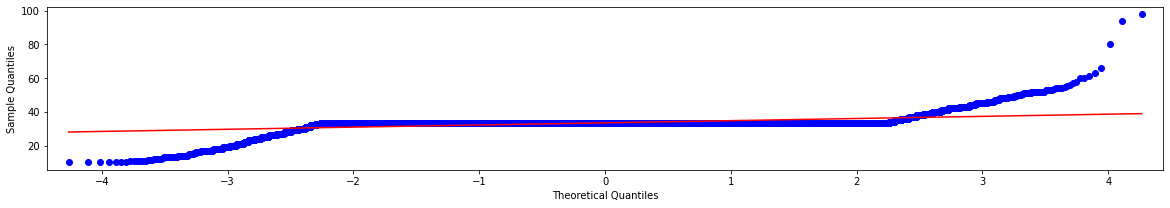

QQ plot of: FiO2


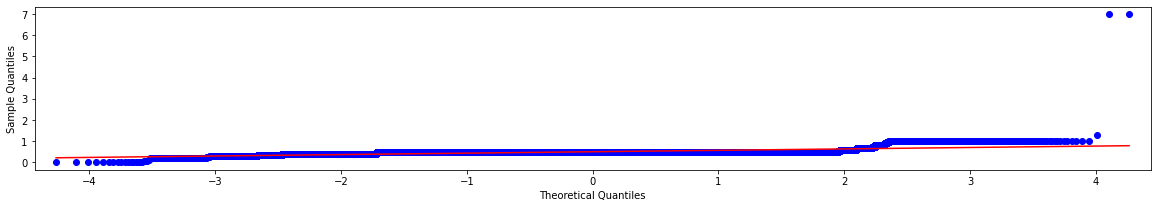

QQ plot of: Chloride


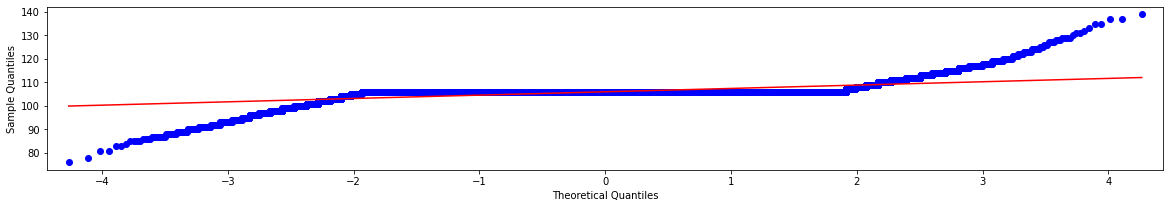

QQ plot of: PTT


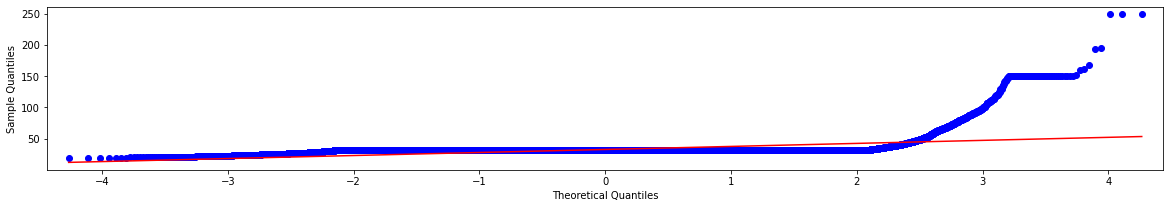

QQ plot of: WBC


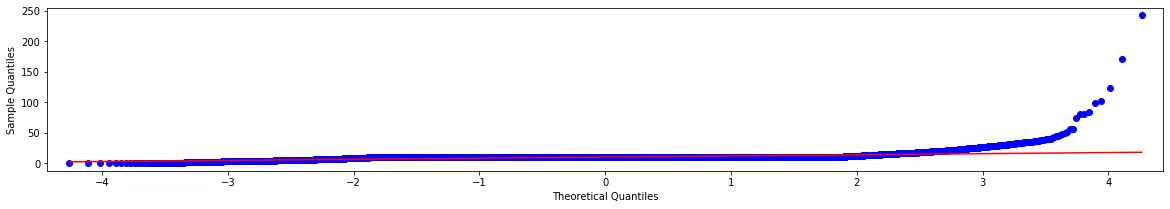

QQ plot of: Platelets


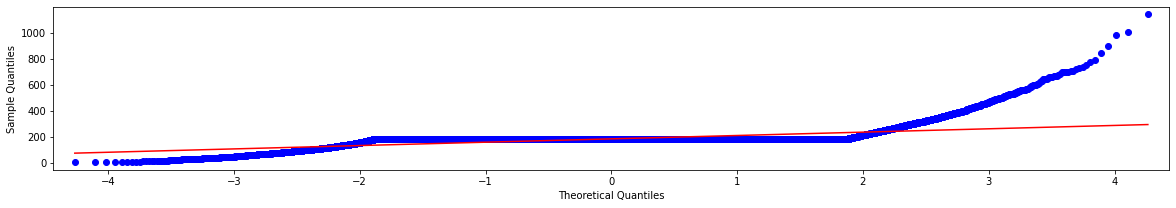

QQ plot of: Age


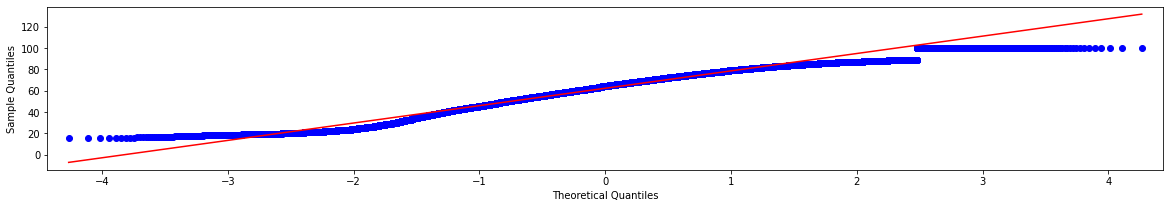

QQ plot of: HospAdmTime


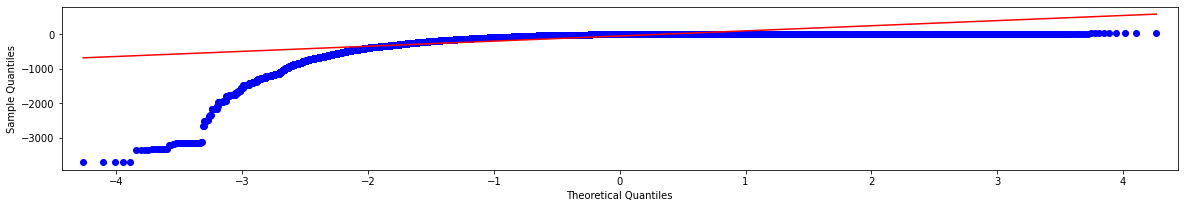

QQ plot of: ICULOS


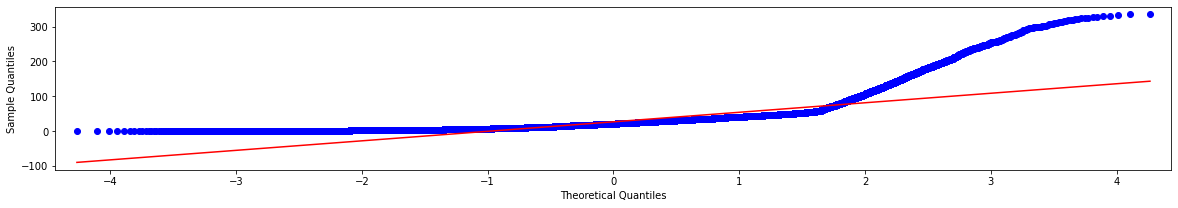

In [78]:
import statsmodels.api as sm
import pylab

for i, val in enumerate(dataset2):
    print('QQ plot of:', val)
    sm.qqplot(dataset2[val], line='s')
    plt.show()

Text(0.5, 0.98, 'Histogram Plots for all Numeric Variables')

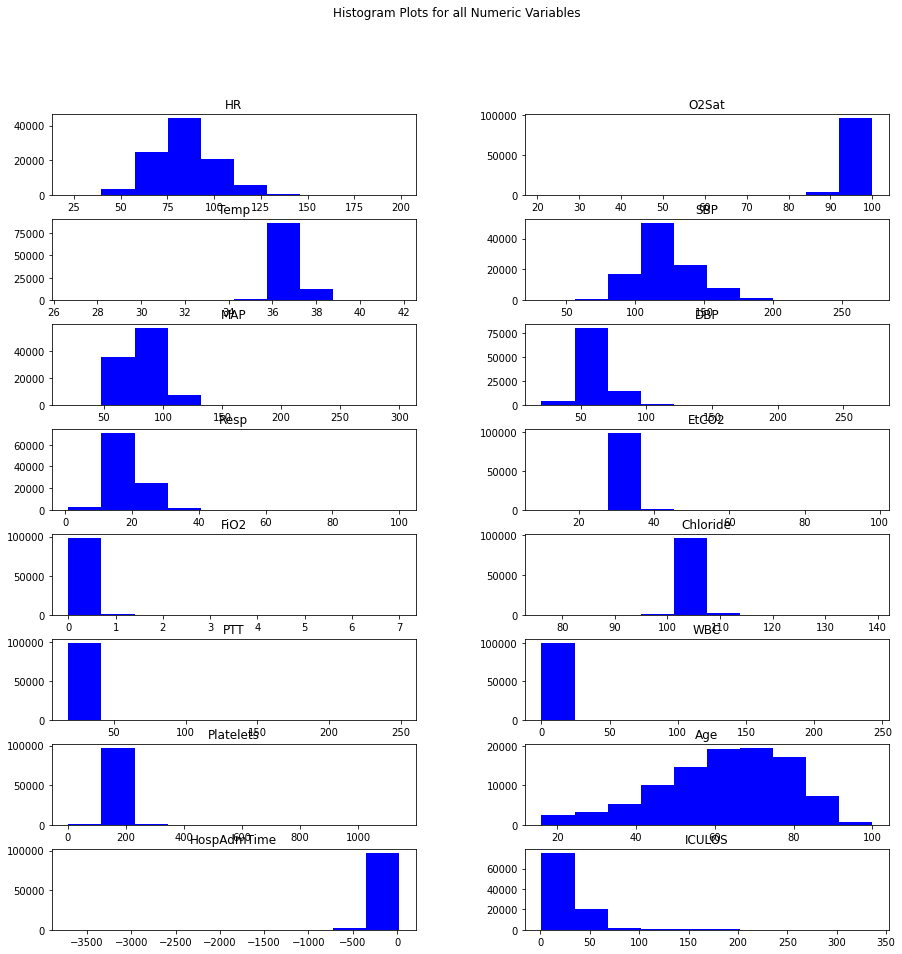

In [79]:
dataset2.hist(layout=(8,2),color='blue', figsize=(15,15), grid=False)
plt.suptitle("Histogram Plots for all Numeric Variables")

In [80]:
from scipy import stats

k2, p = stats.normaltest(dataset2)

In [81]:

alpha = 0.05

In [82]:
cols

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'EtCO2',
 'FiO2',
 'Chloride',
 'PTT',
 'WBC',
 'Platelets',
 'Age',
 'HospAdmTime',
 'ICULOS']

In [83]:
for i in cols:
    print ([i])
    a,b= stats.normaltest(dataset2[[i]])
    print (a, b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['HR']
[4291.72578534] [0.]
The null hypothesis can be rejected
['O2Sat']
[87596.65818689] [0.]
The null hypothesis can be rejected
['Temp']
[27107.90002601] [0.]
The null hypothesis can be rejected
['SBP']
[8589.44223157] [0.]
The null hypothesis can be rejected
['MAP']
[31636.55361958] [0.]
The null hypothesis can be rejected
['DBP']
[40803.57971098] [0.]
The null hypothesis can be rejected
['Resp']
[27837.54144233] [0.]
The null hypothesis can be rejected
['EtCO2']
[60897.23015507] [0.]
The null hypothesis can be rejected
['FiO2']
[233103.52036475] [0.]
The null hypothesis can be rejected
['Chloride']
[37166.95564575] [0.]
The null hypothesis can be rejected
['PTT']
[212817.0031669] [0.]
The null hypothesis can be rejected
['WBC']
[284289.12184281] [0.]
The null hypothesis can be rejected
['Platelets']
[138613.84159654] [0.]
The null hypothesis can be rejected
['Age']
[3977.00216493] [0.]
The null hypothesis can be rejected
['HospAdmTime']
[148728.4778496] [0.]
The null hypothesis c

In [84]:
for i in cols:
    print ([i])
    a,b= stats.jarque_bera(dataset2[[i]])
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['HR']
Statistics 5417.102568721224 p-value 0.0
The null hypothesis can be rejected
['O2Sat']
Statistics 9933507.032283302 p-value 0.0
The null hypothesis can be rejected
['Temp']
Statistics 936327.1137670351 p-value 0.0
The null hypothesis can be rejected
['SBP']
Statistics 12659.538636918698 p-value 0.0
The null hypothesis can be rejected
['MAP']
Statistics 279216.85401938175 p-value 0.0
The null hypothesis can be rejected
['DBP']
Statistics 595689.423125516 p-value 0.0
The null hypothesis can be rejected
['Resp']
Statistics 196945.08868870192 p-value 0.0
The null hypothesis can be rejected
['EtCO2']
Statistics 275374496.6169818 p-value 0.0
The null hypothesis can be rejected
['FiO2']
Statistics 13596668847.428186 p-value 0.0
The null hypothesis can be rejected
['Chloride']
Statistics 26896313.18242718 p-value 0.0
The null hypothesis can be rejected
['PTT']
Statistics 893321298.7729198 p-value 0.0
The null hypothesis can be rejected
['WBC']
Statistics 51522862848.79261 p-value 0.0
Th

In [85]:
for i in cols:
    print ([i])
    a= stats.anderson(dataset2[i], dist='norm')
    print (a)
    if a[0] > a[1][2]:  
        print("The null hypothesis can be rejected at", a[2][2],"% significance level")
    else:
        print("The null hypothesis cannot be rejected")

['HR']
AndersonResult(statistic=417.73669888664153, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The null hypothesis can be rejected at 5.0 % significance level
['O2Sat']
AndersonResult(statistic=3357.0311352503923, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The null hypothesis can be rejected at 5.0 % significance level
['Temp']
AndersonResult(statistic=13876.5125662637, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The null hypothesis can be rejected at 5.0 % significance level
['SBP']
AndersonResult(statistic=1030.7268658652174, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The null hypothesis can be rejected at 5.0 % significance level
['MAP']
AndersonResult(statistic=1115.7028502827307, critica

In [ ]:
for i in cols:
    print ([i])
    a,b= stats.kstest(dataset2[[i]], 'norm')
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['HR']


In [ ]:
for i in cols:
    print ([i])
    a,b= stats.shapiro(dataset2[[i]])
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")